In [3]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import RMSprop

In [4]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


In [5]:
from tensorflow.keras import backend as K

if K.image_data_format() == 'channels_first':
    train_images=mnist_train_images.reshape(mnist_train_images.shape[0], 1,28,28)
    test_images=mnist_test_images.reshape(mnist_test_images.shape[0], 1,28,28)
    input_shape=(1,28,28)
else:
    train_images=mnist_train_images.reshape(mnist_train_images.shape[0] ,28,28,1)
    test_images=mnist_test_images.reshape(mnist_test_images.shape[0], 28,28,1)
    input_shape=(28,28,1)
    
train_images=train_images.astype('float32')
test_images=test_images.astype('float32')
train_images /= 255
test_images /= 255

In [6]:
train_labels = tensorflow.keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = tensorflow.keras.utils.to_categorical(mnist_test_labels, 10)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


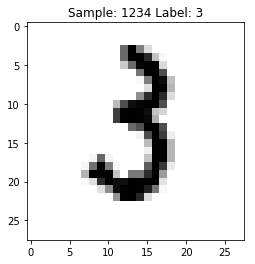

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
def display_samp(num):
  print(train_labels[num])
  label=train_labels[num].argmax(axis=0)
  image=train_images[num].reshape([28,28])
  plt.title('Sample: %d Label: %d' %(num, label))
  plt.imshow(image, cmap=plt.get_cmap('gray_r'))
  plt.show()
  
display_samp(1234)

In [10]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [11]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
history=model.fit(train_images, train_labels,batch_size=32,epochs=10,verbose=2,
                 validation_data=(test_images, test_labels))

In [ ]:
score=model.evaluate(test_images,test_labels, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
for x in range(1000):
  test_image=test_images[x,:].reshape(1,784)
  predicted_cat=model.predict(test_image).argmax()
  label=test_labels[x].argmax()
  if(predicted_cat != label):
    plt.title('Prediction: %d Label: %d' % (predicted_cat,label))
    plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
    plt.show()